## PCA

[pca的实现](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html) 
<br>
[原理](http://blog.csdn.net/zhongkelee/article/details/44064401)

### 1. 生成三维的随机数据
+ 多元高斯分布
  $
    u_1 = [0,0,0],
    u_2 = [1,1,1],
    \Sigma_1 = \Sigma_2 = 
        \begin{pmatrix} 
        1 & 0 & 0\\
        0 & 1 & 0\\
        0 & 0 & 1\\
        \end{pmatrix}
  $

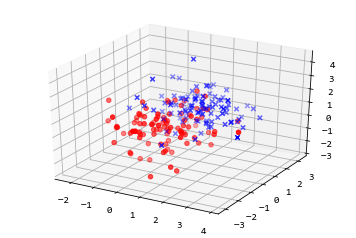

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

sample_num = 100

mean_1 = np.array([0,0,0])
conv_1 = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])
class_1_sample = np.random.multivariate_normal(mean_1,conv_1,sample_num)

mean_2 = np.array([1,1,1])
conv_2 = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])
class_2_sample = np.random.multivariate_normal(mean_2,conv_2,sample_num)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = class_1_sample[:,0],
           ys = class_1_sample[:,1],
           zs = class_1_sample[:,2],
           marker="o",c="r")

ax.scatter(xs = class_2_sample[:,0],
           ys = class_2_sample[:,1],
           zs = class_2_sample[:,2],
           marker="x",c="b")
plt.show()

### 2. 预处理&构建协方差矩阵

In [2]:
sample_all = np.concatenate((class_1_sample,class_2_sample),axis = 0)
sample_mean = sample_all.mean(axis = 0)
sample_preprocess = sample_all - sample_mean
conv_matrix = np.matmul(sample_preprocess.T,sample_preprocess)
conv_matrix = conv_matrix/sample_preprocess.shape[0]
conv_matrix

array([[ 1.20130612,  0.2911911 ,  0.26346267],
       [ 0.2911911 ,  1.30192841,  0.36597246],
       [ 0.26346267,  0.36597246,  1.24700116]])

### 3. 计算协方差矩阵的特征值和特征向量

In [3]:
# 特征向量按列分布，即特征值eig_val[i]对应的特征向量为eig_vec[:,i]
eig_val, eig_vec = np.linalg.eig(conv_matrix)
print(eig_val)
print(eig_vec)
print(np.matmul(conv_matrix,eig_vec))
print(eig_val*eig_vec)

[ 1.87152144  0.97153722  0.90717703]
[[ 0.50551503  0.86085291  0.05819636]
 [ 0.63426799 -0.3250372  -0.70146628]
 [ 0.5849433  -0.39151383  0.71032264]]
[[ 0.94608222  0.83635065  0.0527944 ]
 [ 1.18704614 -0.31578574 -0.63635409]
 [ 1.09473393 -0.38037026  0.64438838]]
[[ 0.94608222  0.83635065  0.0527944 ]
 [ 1.18704614 -0.31578574 -0.63635409]
 [ 1.09473393 -0.38037026  0.64438838]]


### 4.  选取变换矩阵并变换到子空间

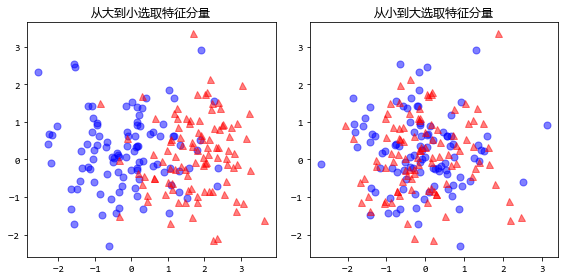

In [4]:
plt.figure(figsize=(8,4))

# 按照正常从大到小选取
sorted_index = eig_val.argsort()[::-1]
transform_matrix = eig_vec[:,sorted_index[:2]]
pca_result = sample_all.dot(transform_matrix)

ax = plt.subplot(121)
ax.plot(pca_result[:sample_num,0], pca_result[:sample_num,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
ax.plot(pca_result[sample_num:,0], pca_result[sample_num:,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
ax.set_title("从大到小选取特征分量")

# 从小到大，对比
sorted_index = eig_val.argsort()
transform_matrix = eig_vec[:,sorted_index[:2]]
pca_result = sample_all.dot(transform_matrix)
ax = plt.subplot(122)
ax.plot(pca_result[:sample_num,0], pca_result[:sample_num,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
ax.plot(pca_result[sample_num:,0], pca_result[sample_num:,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
ax.set_title("从小到大选取特征分量")

plt.tight_layout()
plt.show()